In [44]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk 
from nltk.stem import WordNetLemmatizer 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('company.csv', encoding= 'unicode_escape')
df.drop('emotion_in_tweet_is_directed_at', axis=1,inplace=True)
df.columns=['tweet_text', 'sentiment']

In [3]:
df.isnull().sum()

tweet_text    1
sentiment     0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9092 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   sentiment   9092 non-null   object
dtypes: object(2)
memory usage: 213.1+ KB


In [6]:
df.head()

,tweet_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


# Tokenize, Lemmatize, Stop Words

In [7]:
tokenizer=RegexpTokenizer(r'[a-zA-Z]+')
stop_words=list(stopwords.words("english"))
stop_words+=['sxsw','mention', 'link', 'ipad', 'rt', 'google', 'apple', 'quot', 'iphone', 'store',
             'app', 'amp', 'austin','new','pop','social', 'sxswi', 'today','launch', 'android',
            'circle', 'via', 'line', 'w']

In [8]:
data=df.tweet_text
target=df.sentiment

In [9]:
def process_article(article):
    tokens = tokenizer.tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed 

In [10]:
# applying the above function to our data/features 
processed_data = list(map(process_article, data))

In [12]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

9126

In [14]:
lemmatizer=WordNetLemmatizer()

In [15]:
# creating a list with all lemmatized outputs
lemmatized_output = []

for listy in processed_data:
    lemmed = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(lemmed)

In [17]:
clean_data=pd.DataFrame(lemmatized_output, columns=['text'])

In [18]:
clean_data

,text
0,wesley g hr tweeting rise dead need upgrade pl...
1,jessedee know fludapp awesome likely appreciat...
2,swonderlin wait also sale
3,hope year festival crashy year
4,sxtxstate great stuff fri marissa mayer tim re...
...,...
9087,everywhere
9088,wave buzz interrupt regularly scheduled geek p...
9089,zeiger physician never reported potential ae y...
9090,verizon customer complained time fell back hou...


In [19]:
data=pd.concat([clean_data, target], axis=1)

In [20]:
data.dropna(inplace=True)

In [21]:
data.head()

,text,sentiment
0,wesley g hr tweeting rise dead need upgrade pl...,Negative emotion
1,jessedee know fludapp awesome likely appreciat...,Positive emotion
2,swonderlin wait also sale,Positive emotion
3,hope year festival crashy year,Negative emotion
4,sxtxstate great stuff fri marissa mayer tim re...,Positive emotion


In [22]:
data.sentiment.value_counts()

No emotion toward brand or product    5387
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: sentiment, dtype: int64

In [23]:
neg_emo=data[data['sentiment']=='Negative emotion']
pos_emo=data[data.sentiment=='Positive emotion']
np_emo=data[data.sentiment=='No emotion toward brand or product']
hesitation=data[data.sentiment=="I can't tell"]

In [24]:
from nltk.probability import FreqDist

In [25]:
neg_words=[]
for text in data.text.to_string():
    tokens = tokenizer.tokenize(text)
    neg_words.append(tokens)

In [26]:
def word_tokenizer(data, col):
    token=[]
    for item in data[col]:
        token.extend(tokenizer.tokenize(item))
    return token

In [27]:
ttw_neg=word_tokenizer(neg_emo,'text')
ttw_pos=word_tokenizer(pos_emo,'text')
ttw_np=word_tokenizer(np_emo,'text')
ttw_hes=word_tokenizer(hesitation,'text')

In [28]:
freq_neg=FreqDist(ttw_neg)
freq_pos=FreqDist(ttw_pos)
freq_np=FreqDist(ttw_np)
freq_hes=FreqDist(ttw_hes)

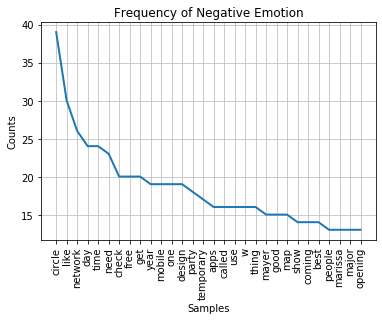

In [45]:
freq_neg.plot(30, title='Frequency of Negative Emotion')
plt.show()

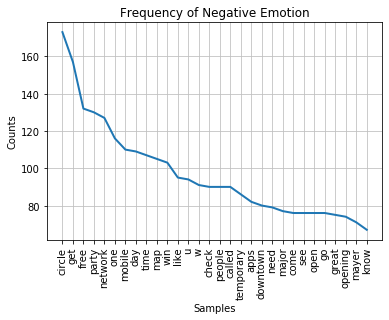

In [46]:
freq_pos.plot(30, title='Frequency of Negative Emotion')
plt.show()

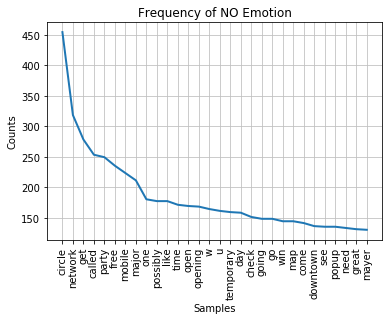

In [48]:
freq_np.plot(30, title='Frequency of NO Emotion')
plt.show()

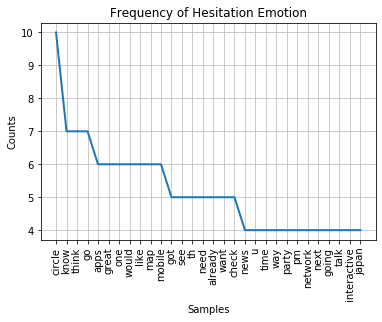

In [49]:
freq_hes.plot(30, title='Frequency of Hesitation Emotion')
plt.show()

# Word Clouds


In [69]:
dict(freq_neg.most_common(25))

{'circle': 39,
 'like': 30,
 'network': 26,
 'day': 24,
 'time': 24,
 'need': 23,
 'check': 20,
 'free': 20,
 'get': 20,
 'year': 19,
 'mobile': 19,
 'one': 19,
 'design': 19,
 'party': 18,
 'temporary': 17,
 'apps': 16,
 'called': 16,
 'use': 16,
 'w': 16,
 'thing': 16,
 'mayer': 15,
 'good': 15,
 'map': 15,
 'show': 14,
 'coming': 14}

In [53]:
#neg_counts = [x[1] for x in freq_neg.most_common(25)]
#neg_words=[x[0] for x in freq_neg.most_common(25)]

#pos_counts = [x[1] for x in freq_pos.most_common(25)]
#pos_words=[x[0] for x in freq_pos.most_common(25)]

#np_counts = [x[1] for x in freq_np.most_common(25)]
#np_words=[x[0] for x in freq_np.most_common(25)]

#hes_counts = [x[1] for x in freq_hes.most_common(25)]
#hes_words=[x[0] for x in freq_hes.most_common(25)]


In [64]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158515 sha256=bf8ea5ac44c439caf0ce24baaaa13469526163a6e2b671fe63729ea2802d43b0
  Stored in directory: /Users/hochinh/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [66]:
# Getting our data into a dictionary
# FORMAT:  dictionary = dict(zip(keys, values))
# !pip install wordcloud
from wordcloud import WordCloud
neg_dict = dict(zip(neg_words, neg_counts))
pos_dict = dict(zip(pos_words, pos_counts))
np_dict = dict(zip(np_words, np_counts))
hes_dict = dict(zip(hes_words, hes_counts))

In [77]:
def word_cloud(dictionary):
    # Create the word cloud:

    wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(dictionary)

# Display the generated image w/ matplotlib:

    plt.figure(figsize=(10,10), facecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    
# Uncomment the next line if you want to save your image:
# plt.savefig('satire_wordcloud.png')

    plt.show()

In [78]:
word_dicts=[neg_dict, pos_dict, np_dict, hes_dict]

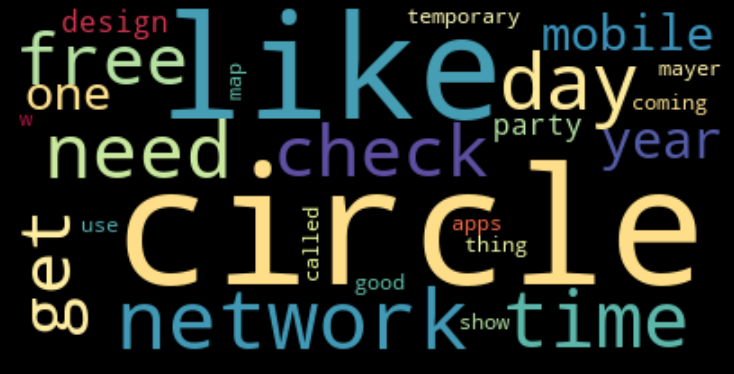

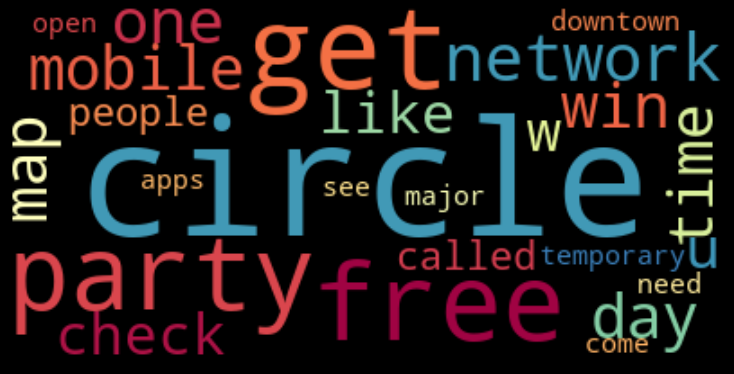

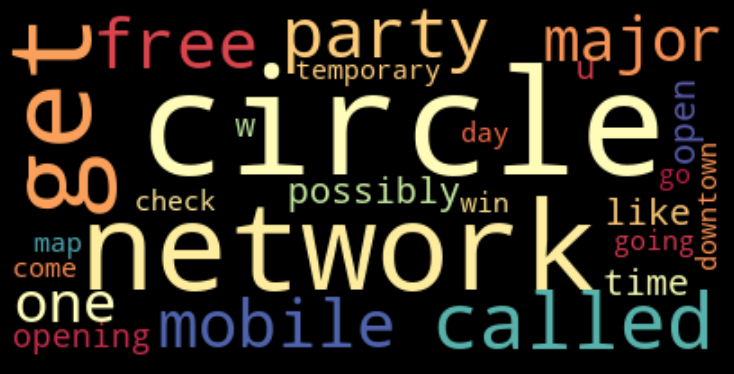

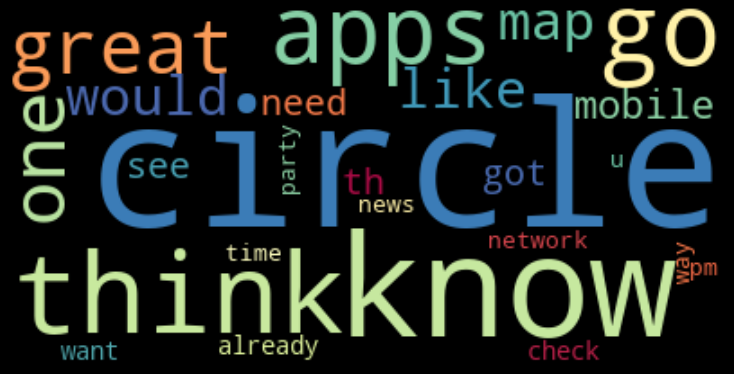

In [79]:
for dictionary in word_dicts:
    word_cloud(dictionary)

# LDA

In [80]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

In [86]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
import spacy

In [91]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):

    texts = [[word for word in doc.split() if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in doc if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data.text) 

In [92]:
data_ready

[['tweet', 'rise', 'dead', 'need', 'upgrade', 'plugin', 'station'],
 ['know', 'likely', 'appreciate', 'design', 'also', 'give', 'free'],
 ['wait', 'also', 'sale'],
 [],
 ['sxtxstate', 'great', 'stuff', 'conference'],
 ['teachntech',
  'speechtherapy',
  'communication',
  'showcase',
  'conference',
  'http',
  'iear',
  'edchat',
  'asd'],
 ['beautifully',
  'smart',
  'simple',
  'idea',
  'thenextweb',
  'write',
  'hollergram',
  'bit',
  'ieavob'],
 ['count', 'strong', 'canadian', 'dollar', 'mean', 'stock', 'gear'],
 ['excited', 'still', 'run', 'fail'],
 ['find', 'start', 'hurricaneparty', 'http', 'bit', 'wait', 'til', 'come'],
 ['game',
  'time',
  'pk',
  'still',
  'prefer',
  'gowalla',
  'far',
  'good',
  'looking',
  'date'],
 ['get',
  'love',
  'calendar',
  'feature',
  'top',
  'show',
  'case',
  'check',
  'bit',
  'axzwxb'],
 ['http', 'com'],
 ['awesomely', 'rad', 'http', 'bit', 'hollergram'],
 [],
 ['notice', 'come', 'weekend', 'many', 'user', 'hour', 'late', 'morni

In [97]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [96]:
import gensim.downloader as api
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
import gensim

from nltk.corpus import stopwords
import gensim.corpora as corpora

In [100]:
lda_model.print_topics()

[(0,
  '0.031*"day" + 0.027*"offer" + 0.026*"say" + 0.023*"use" + 0.022*"open" + 0.021*"good" + 0.019*"time" + 0.019*"take" + 0.019*"make" + 0.017*"think"'),
 (1,
  '0.028*"free" + 0.028*"see" + 0.026*"thank" + 0.025*"know" + 0.022*"win" + 0.021*"give" + 0.019*"need" + 0.018*"buy" + 0.017*"apparently" + 0.016*"may"'),
 (2,
  '0.036*"go" + 0.026*"come" + 0.020*"look" + 0.020*"location" + 0.017*"design" + 0.016*"party" + 0.014*"tonight" + 0.013*"geek" + 0.012*"work" + 0.011*"last"'),
 (3,
  '0.045*"check" + 0.045*"get" + 0.022*"want" + 0.021*"network" + 0.021*"way" + 0.015*"set" + 0.015*"love" + 0.014*"call" + 0.014*"sell" + 0.013*"tomorrow"')]

In [101]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.108025  0.274724       1        1  26.382832
0     -0.208877 -0.234679       2        1  26.334242
3      0.292050 -0.068663       3        1  23.813177
1      0.024852  0.028618       4        1  23.469755, topic_info=           Term        Freq       Total Category  logprob  loglift
65        check  463.000000  463.000000  Default  30.0000  30.0000
67          get  462.000000  462.000000  Default  29.0000  29.0000
134          go  411.000000  411.000000  Default  28.0000  28.0000
355         day  349.000000  349.000000  Default  27.0000  27.0000
10         free  285.000000  285.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
772       guide   52.785221   53.500946   Topic4  -5.2596   1.4360
233         lot   55.641197   56.422009   Topic4  -5.2069   1.4355
834     present   64.243721   65.167061   Topic4  -5.0631   1.4352
887       happy   57.793262   58.700340   Topic4  -5.1690   1.4339
762  everywhere   57.059315   58.087223   Topic4  -5.1817   1.4316

[156 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
7         4  0.984919        also
1011      3  0.005903  apparently
1011      4  0.991761  apparently
245       2  0.990990      attend
582       2  0.989190         big
...     ...       ...         ...
157       1  0.997188        well
130       4  0.994714         win
502       1  0.997397        work
235       2  0.995533       would
321       4  0.994884        year

[131 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])